In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('data_science_job.csv')

In [4]:
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [5]:
df.shape

(19158, 13)

In [10]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [11]:
cols=[var for var in df.columns if df[var].isnull().mean()*100 < 5 and  df[var].isnull().mean()*100 > 0]

In [12]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [17]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
9529,0.949,no_enrollment,Graduate,14.0,5.0
745,0.698,no_enrollment,Masters,9.0,86.0
4748,0.624,no_enrollment,Graduate,19.0,NaN
17740,0.910,no_enrollment,Graduate,20.0,24.0
9754,0.920,no_enrollment,Graduate,17.0,36.0


In [19]:
len(df[cols].dropna()) / len(df[cols])
# kina data left reh javega after dopping the missing values rows

0.8968577095730244

In [20]:
new_df=df[cols].dropna()

In [22]:
df.shape,new_df.shape

((19158, 13), (17182, 5))

array([[<Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'experience'}>],
       [<Axes: title={'center': 'training_hours'}>, <Axes: >]],
      dtype=object)

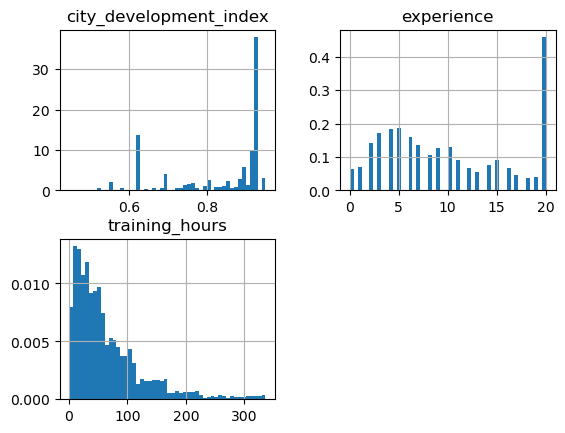

In [26]:
new_df.hist(bins=50,density=True)

<Axes: >

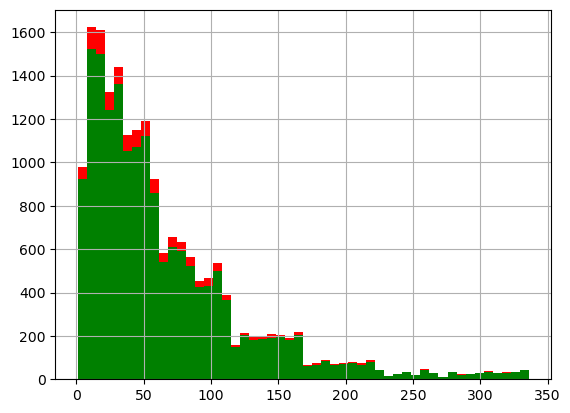

In [36]:
fig=plt.figure()
ax=fig.add_subplot(111)

# orginal data 
df['training_hours'].hist(color='red',ax=ax,bins=50)

# after cca
new_df['training_hours'].hist(color='green',ax=ax,bins=50)

# overlap hoge ne it shows after cca disgtribution ch koi farak ni aya

<Axes: ylabel='Density'>

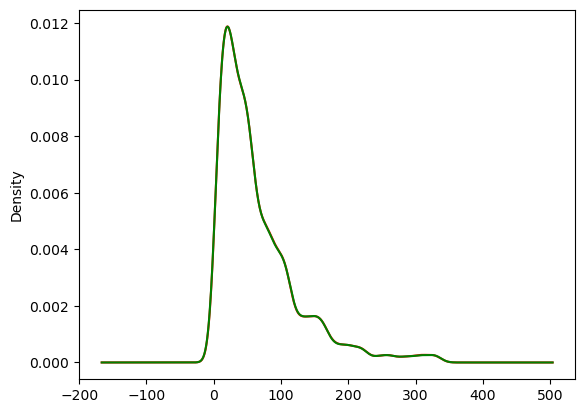

In [40]:
fig=plt.figure()
ax=fig.add_subplot(111)

df['training_hours'].plot.density(color='r',ax=ax)

new_df['training_hours'].plot.density(color='g',ax=ax)

In [42]:
# hun categorical di vari

temp=pd.concat([
    df['education_level'].value_counts() /len(df),
    new_df['education_level'].value_counts() /len(new_df)
],axis=1)

temp.columns=['original','cca']

In [43]:
temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


In [47]:
temp=pd.concat([
    df['enrolled_university'].value_counts() / len(df),
    new_df['enrolled_university'].value_counts() / len(new_df)
],axis=1)

temp.columns=['original','cca']

In [48]:
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079
